In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cooler
import cooltools

# Базовые навыки работы с `cool` Hi-C картой

In [3]:
clrs_dir = '/home/zin_data/hic_prac_share/distiller_results/results/coolers_library_group/'

In [4]:
cooler.fileops.list_coolers(clrs_dir+'wt.NC_000913.3.mapq_30.1000.mcool')

['/resolutions/1000', '/resolutions/5000', '/resolutions/8000']

In [5]:
RES = 8000
clr = cooler.Cooler(clrs_dir+f'wt.NC_000913.3.mapq_30.1000.mcool::resolutions/{RES}')

In [6]:
print(f'chromosomes: {clr.chromnames}, binsize: {clr.binsize}')

chromosomes: ['NC_000913.3'], binsize: 8000


In [7]:
mtr = clr.matrix(balance=False)[:]

In [8]:
mtr.max(), mtr.min()

(82121, 0)

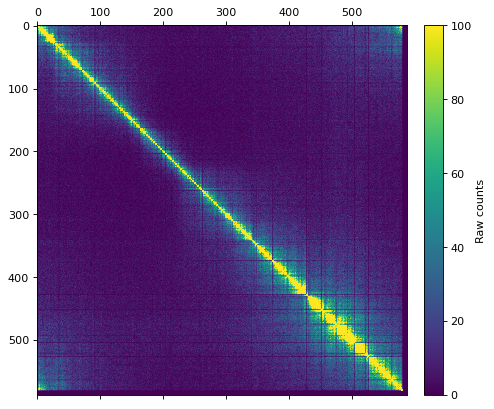

In [9]:
f, ax = plt.subplots(figsize=(7,6), dpi=80)

im = ax.matshow(mtr, vmax=100);
plt.colorbar(im, fraction=0.046, pad=0.04, label='Raw counts')
plt.show()

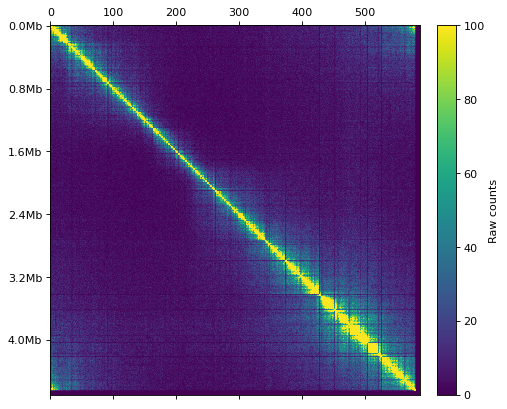

In [10]:
f, ax = plt.subplots(figsize=(7,6), dpi=80)

im = ax.matshow(mtr, vmax=100);
plt.colorbar(im, fraction=0.046, pad=0.04, label='Raw counts')

def x_axis_formatter(x, pos):
    return '{:.1f}Mb'.format(x * RES/10**6)
    
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(x_axis_formatter))
plt.show()

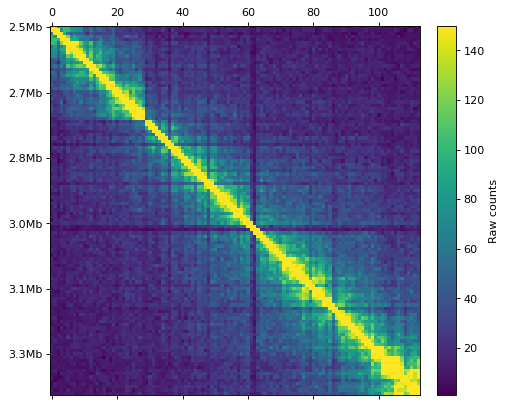

In [16]:
f, ax = plt.subplots(figsize=(7,6), dpi=80)

region = (clr.chromnames[0], 2.5e6, 3.4e6)
mtr = clr.matrix(balance=False).fetch(region)

im = ax.matshow(mtr, vmax=150);
plt.colorbar(im, fraction=0.046, pad=0.04, label='Raw counts')

def x_axis_formatter(x, pos):
    return '{:.1f}Mb'.format((x * RES + region[1])/10**6)
    
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(x_axis_formatter))
plt.show()

# Карта с большим разрешением

In [17]:
RES = 1000
clr = cooler.Cooler(clrs_dir+f'wt.NC_000913.3.mapq_30.1000.mcool::resolutions/{RES}')

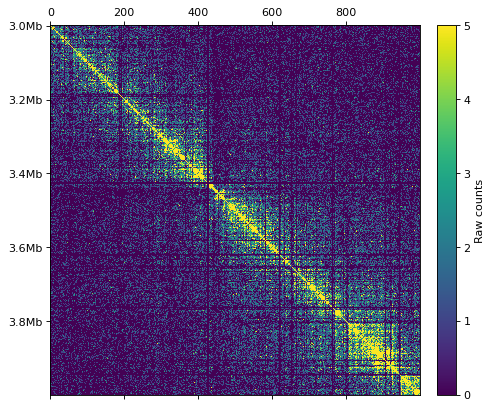

In [18]:
f, ax = plt.subplots(figsize=(7,6), dpi=80)

region = (clr.chromnames[0], 3e6, 4e6)
mtr = clr.matrix(balance=False).fetch(region)

im = ax.matshow(mtr, vmax=5);
plt.colorbar(im, fraction=0.046, pad=0.04, label='Raw counts')

def x_axis_formatter(x, pos):
    return '{:.1f}Mb'.format((x * RES + region[1])/10**6)
    
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(x_axis_formatter))
plt.show()

# Сравниваем две карты

In [32]:
RES = 8000
wt_clr = cooler.Cooler(clrs_dir+f'wt.NC_000913.3.mapq_30.1000.mcool::resolutions/{RES}')
hupab_clr = cooler.Cooler(clrs_dir+f'hupAB.NC_000913.3.mapq_30.1000.mcool::resolutions/{RES}')

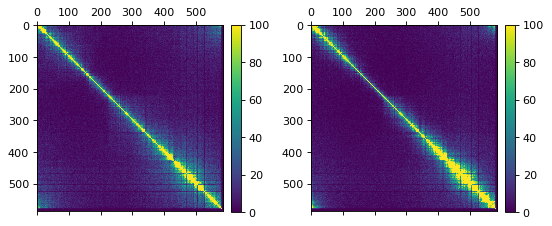

In [33]:
f, axs = plt.subplots(ncols=2, figsize=(7,6), dpi=80, layout='tight')

for clr, ax in zip([wt_clr, hupab_clr], axs):
    mtr = clr.matrix(balance=False)[:]
    im = ax.matshow(mtr, vmin=0, vmax=100);
    plt.colorbar(im, fraction=0.046, pad=0.04)
plt.show()

In [34]:
wt_clr.matrix(balance=False)[:].shape, hupab_clr.matrix(balance=False)[:].shape

((588, 588), (588, 588))

In [35]:
clr_log2fc = np.log2(np.divide(hupab_clr.matrix(balance=False)[:] + 1, wt_clr.matrix(balance=False)[:] + 1))

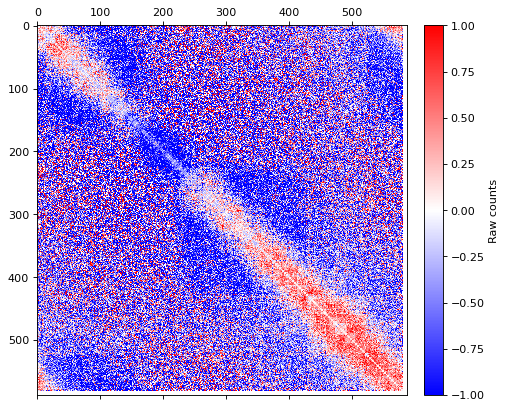

In [36]:
f, ax = plt.subplots(figsize=(7,6), dpi=80)

im = ax.matshow(clr_log2fc, vmin=-1, vmax=1, cmap='bwr');
plt.colorbar(im, fraction=0.046, pad=0.04, label='Raw counts')
plt.show()